In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

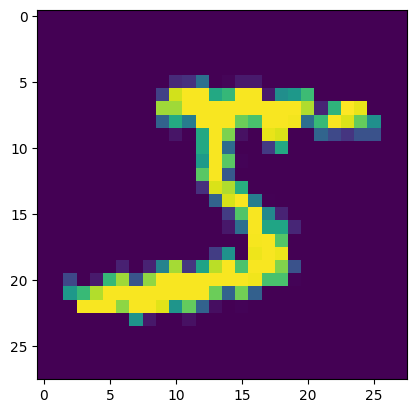

In [2]:
imgs,lbls = torch.load("../data/processed/test_data.pt")
plt.imshow(imgs[0])

In [3]:
# Assuming you have a batched tensor called 'batch_tensor'
batch_size = imgs.size(0)  # Assuming the batch dimension is the first dimension
num_elements_to_select = 10

# Generate random indices for each row independently
random_indices = torch.randperm(imgs.size(0))[:num_elements_to_select]

# Use the random indices to select elements from each row
selected_elements = imgs[random_indices,:]

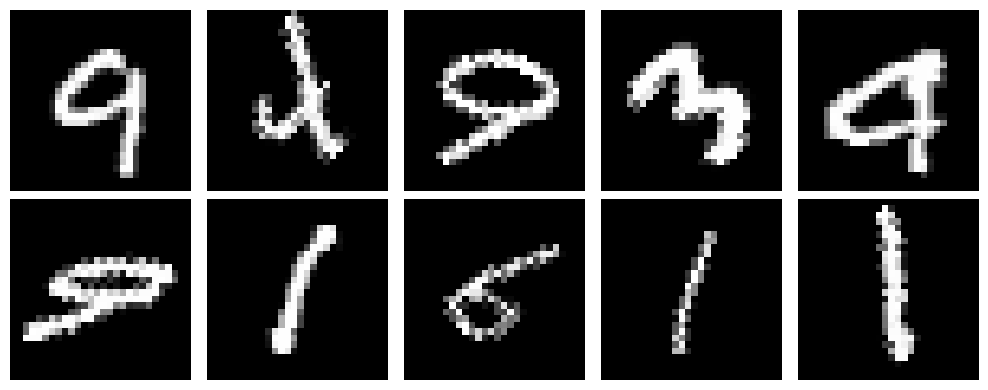

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Flatten the 2D grid of subplots into a 1D array
axes = axes.flatten()

for i in range(10):
    # Reshape the image to (28, 28)
    image = selected_elements[i].numpy()

    # Plot the image
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [11]:
from torchvision.transforms import Normalize
from torch import mean, std

def TransformMnist(x):
    normalize_x = Normalize(mean=mean(x), std=std(x))
    return lambda x: normalize_x(x)

transformed_selected_elements = TransformMnist(selected_elements)(selected_elements).numpy()
np.save("../data/processed/predict.npy", transformed_selected_elements)